In [78]:
# import initial libraries
import pandas as pd
import numpy as np
from numpy import NaN
import seaborn as sns
from scipy import stats
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from wordcloud import WordCloud
import nltk

In [3]:
train = pd.read_csv('/Users/dad/Downloads/mercari-price-suggestion-challenge/train.tsv', sep = '\t', low_memory=True)
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
#function to get all info in one go
def full_info(df):
    df_column=[]
    df_dtype=[]
    df_null=[]
    df_nullc=[]
    df_mean=[]
    df_median=[]
    df_std=[]
    df_min=[]
    df_max=[]
    df_uniq=[]
    df_count=[]
    for col in df.columns: 
        df_column.append(  col )
        df_dtype.append( df[col].dtype)
        df_null.append( round(100 * df[col].isnull().sum(axis=0)/len(df[col]),2))
        df_nullc.append( df[col].isnull().sum(axis=0))
        df_uniq.append( df[col].nunique()) if df[col].dtype == 'object' else df_uniq.append( NaN)
        df_mean.append(  '{0:.2f}'.format(df[col].mean())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_mean.append( NaN)
        df_median.append( '{0:.2f}'.format(df[col].median())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_median.append( NaN)
        df_std.append( '{0:.2f}'.format(df[col].std())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_std.append( NaN)
        df_max.append( '{0:.2f}'.format(df[col].max())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_max.append( NaN)
        df_min.append( '{0:.2f}'.format(df[col].min())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_min.append( NaN)
        df_count.append(df[col].count())
    return pd.DataFrame(data = {'ColName':  df_column, 'ColType': df_dtype, 'NullCnt': df_nullc, 'NullCntPrcntg': df_null,  'Min': df_min, 'Max': df_max, 'Mean': df_mean, 'Med': df_median, 'Std': df_std, 'UniqCnt': df_uniq, 'ColValCnt': df_count})


In [5]:
# lets get full desciption of the data
full_info(train)

,ColName,ColType,NullCnt,NullCntPrcntg,Min,Max,Mean,Med,Std,UniqCnt,ColValCnt
0,train_id,int64,0,0.00,0.00,1482534.00,741267.00,741267.00,427971.14,NaN,1482535
1,name,object,0,0.00,NaN,NaN,NaN,NaN,NaN,1225273.0,1482535
2,item_condition_id,int64,0,0.00,1.00,5.00,1.91,2.00,0.90,NaN,1482535
3,category_name,object,6327,0.43,NaN,NaN,NaN,NaN,NaN,1287.0,1476208
4,brand_name,object,632682,42.68,NaN,NaN,NaN,NaN,NaN,4809.0,849853
5,price,float64,0,0.00,0.00,2009.00,26.74,17.00,38.59,NaN,1482535
6,shipping,int64,0,0.00,0.00,1.00,0.45,0.00,0.50,NaN,1482535
7,item_description,object,4,0.00,NaN,NaN,NaN,NaN,NaN,1281426.0,1482531


In [5]:
print(train['category_name'].str.count('/').min())
print(train['category_name'].str.count('/').max())

2.0
4.0


In [6]:
# lets split the category into category splits
train_sp = train.join(train['category_name'].str.split('/', expand=True).add_prefix('category_split_'))

# and lets see how the data looks
train_sp.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_split_0,category_split_1,category_split_2,category_split_3,category_split_4
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,None,None
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,None,None
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,None,None
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,None,None
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,None,None


In [7]:
# lets get full desciption of the data again
full_info(train_sp)

,ColName,ColType,NullCnt,NullCntPrcntg,Min,Max,Mean,Med,Std,UniqCnt,ColValCnt
0,train_id,int64,0,0.00,0.00,1482534.00,741267.00,741267.00,427971.14,NaN,1482535
1,name,object,0,0.00,NaN,NaN,NaN,NaN,NaN,1225273.0,1482535
2,item_condition_id,int64,0,0.00,1.00,5.00,1.91,2.00,0.90,NaN,1482535
3,category_name,object,6327,0.43,NaN,NaN,NaN,NaN,NaN,1287.0,1476208
4,brand_name,object,632682,42.68,NaN,NaN,NaN,NaN,NaN,4809.0,849853
5,price,float64,0,0.00,0.00,2009.00,26.74,17.00,38.59,NaN,1482535
6,shipping,int64,0,0.00,0.00,1.00,0.45,0.00,0.50,NaN,1482535
7,item_description,object,4,0.00,NaN,NaN,NaN,NaN,NaN,1281426.0,1482531
8,category_split_0,object,6327,0.43,NaN,NaN,NaN,NaN,NaN,10.0,1476208
9,category_split_1,object,6327,0.43,NaN,NaN,NaN,NaN,NaN,113.0,1476208


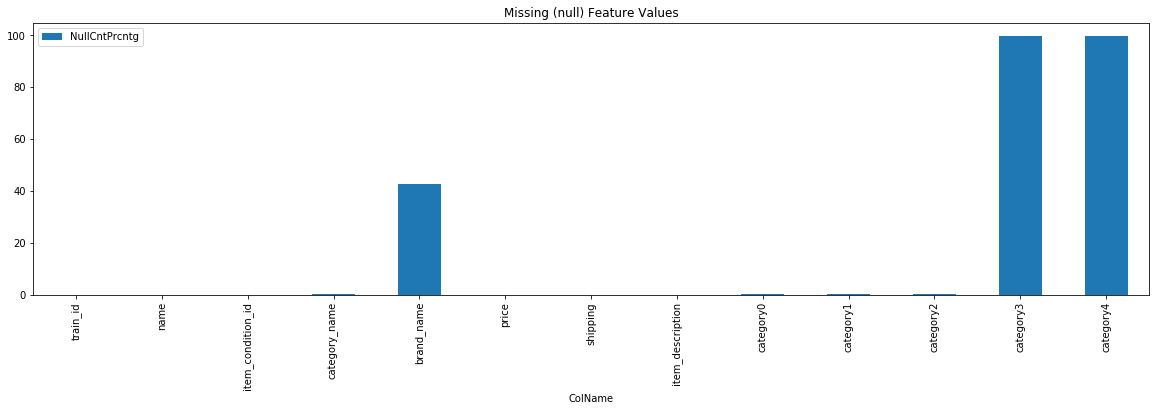

In [8]:
# lets visualize the Null Count percentage graphically
train_sp_info.plot.bar(x = 'ColName', y = 'NullCntPrcntg', figsize=(20, 5),rot=90, title='Missing (null) Feature Values')
plt.show()

In [8]:
# lets drop the category_split_3 and category_split_4 as they have most nulls. lets keep the brand for now.
train_sp_trim=train_sp.drop(['category_split_3', 'category_split_4'],axis=1)
# lets see how the data looks like now
train_sp_trim

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_split_0,category_split_1,category_split_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents


In [9]:
# lets remove the items with price of $0 as well as they are of no use in price prediction
train_sp_trim = train_sp_trim[train_sp_trim.price != 0]


In [12]:
# Create a function to impute missing values
def fill_missing_value(df):
    df['category_split_0'].fillna(value = 'unknown', inplace=True)
    df['category_split_1'].fillna(value = 'unknown', inplace=True)
    df['category_split_2'].fillna(value = 'unknown', inplace=True)
    df['brand_name'].fillna(value = 'unknown', inplace=True)
    df['category_name'].fillna(value = 'unknown', inplace=True)
    df['item_description'].fillna(value = 'No description yet', inplace=True)
    
    return df

In [13]:
# lets apply the fill_missing_value function on the data to fill the nulls
train_fill = fill_missing_value(train_sp_trim)

# lets get full desciption of the data again
full_info(train_fill)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,ColName,ColType,NullCnt,NullCntPrcntg,Min,Max,Mean,Med,Std,UniqCnt,ColValCnt
0,train_id,int64,0,0.0,0.00,1482534.00,741243.72,741238.00,427971.46,NaN,1481661
1,name,object,0,0.0,NaN,NaN,NaN,NaN,NaN,1224596.0,1481661
2,item_condition_id,int64,0,0.0,1.00,5.00,1.91,2.00,0.90,NaN,1481661
3,category_name,object,0,0.0,NaN,NaN,NaN,NaN,NaN,1288.0,1481661
4,brand_name,object,0,0.0,NaN,NaN,NaN,NaN,NaN,4808.0,1481661
5,price,float64,0,0.0,3.00,2009.00,26.75,17.00,38.59,NaN,1481661
6,shipping,int64,0,0.0,0.00,1.00,0.45,0.00,0.50,NaN,1481661
7,item_description,object,0,0.0,NaN,NaN,NaN,NaN,NaN,1280671.0,1481661
8,category_split_0,object,0,0.0,NaN,NaN,NaN,NaN,NaN,11.0,1481661
9,category_split_1,object,0,0.0,NaN,NaN,NaN,NaN,NaN,114.0,1481661


In [13]:
print('\n category_split_0: \n ********************* \n' + str(train_fill.category_split_0.unique()) )
print('\n category_split_1: \n ********************* \n' + str(train_fill.category_split_1.unique()) )
print('\n category_split_2: \n ********************* \n' + str(train_fill.category_split_2.unique()) )
print('\n brand_name: \n ********************* \n' + str(train_fill.brand_name.unique()) )


 category0: 
 ********************* 
['Men' 'Electronics' 'Women' 'Home' 'Sports & Outdoors'
 'Vintage & Collectibles' 'Beauty' 'Other' 'Kids' 'unknown' 'Handmade']

 category1: 
 ********************* 
['Tops' 'Computers & Tablets' 'Tops & Blouses' 'Home Décor' 'Jewelry'
 'Other' 'Swimwear' 'Apparel' 'Collectibles' 'Makeup' 'Fragrance'
 'Dresses' 'Office supplies' 'Shoes' 'Gear' 'Athletic Apparel'
 'Cell Phones & Accessories' 'Jeans' 'Underwear' 'Skin Care' 'Toys'
 "Women's Handbags" 'Video Games & Consoles' 'Coats & Jackets' 'Pants'
 'Girls (4+)' 'Antique' 'Kitchen & Dining' 'Sweaters' 'Boys 0-24 Mos'
 'Girls 0-24 Mos' 'Maternity' 'Bedding' 'Exercise' 'Trading Cards'
 'Boys (4+)' 'Storage & Organization' 'Fan Shop' 'Girls 2T-5T'
 "Men's Accessories" 'Boys 2T-5T' "Women's Accessories"
 'Daily & Travel items' 'unknown' 'Skirts' 'Hair Care' 'Pet Supplies'
 'Book' 'Tools & Accessories' 'Team Sports' 'Home Appliances'
 'Accessories' 'Bags and Purses' 'Sweats & Hoodies' 'Shorts'
 'TV, Aud


 brand_name: 
 ********************* 
['unknown' 'Razer' 'Target' 'Acacia Swimwear' 'Soffe' 'Nike' 'Smashbox'
 "Victoria's Secret" 'rue' 'Scholastic' 'UGG Australia' 'Tarte'
 'Wet n Wild' 'Too Faced' 'Anthropologie' 'Torrid' 'Samsung' 'FOREVER 21'
 'Air Jordan' 'Apple' 'LuLaRoe' 'Hollister' 'PINK' 'Sephora'
 'Under Armour' 'Xbox' 'Kylie Cosmetics' 'The North Face'
 'Brandy Melville' 'lululemon athletica' 'Michael Kors' 'Rae Dunn'
 'Infantino' "Levi's®" 'patagonia' 'Barbie' 'H&M' 'Adidas'
 'Nostalgia Electrics' 'Littlest Pet Shop' 'Sea Wees'
 'Motherhood Maternity' 'Melissa & Doug' 'Pokemon' 'Nintendo'
 'Silver Jeans Co.' 'Spin Master' 'Gap' 'Lululemon' 'Rock Revival'
 'Fossil' 'Merona' 'Boulevard Boutique' 'MARC JACOBS' 'Steve Madden'
 'No Boundaries' 'Faded Glory' 'Miss Me' 'Salvatore Ferragamo'
 'Urban Outfitters' 'Bath & Body Works' 'Nars' 'Manolo Blahnik'
 'Ralph Lauren' 'LC Lauren Conrad' 'Kate Spade' 'Elmers' 'Leap Frog'
 'beautyblender®' 'PANDORA' 'Sony' 'aerie' 'GUESS' 'Youniq

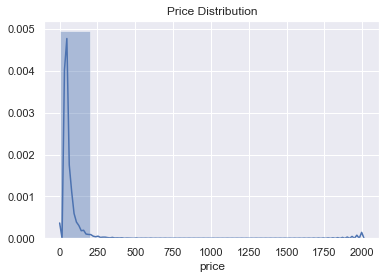

In [20]:
# lets see the price distribution visually
sns.set()
sns.distplot(train_fill['price'], bins = 50)
plt.title('Price Distribution', fontsize=12);

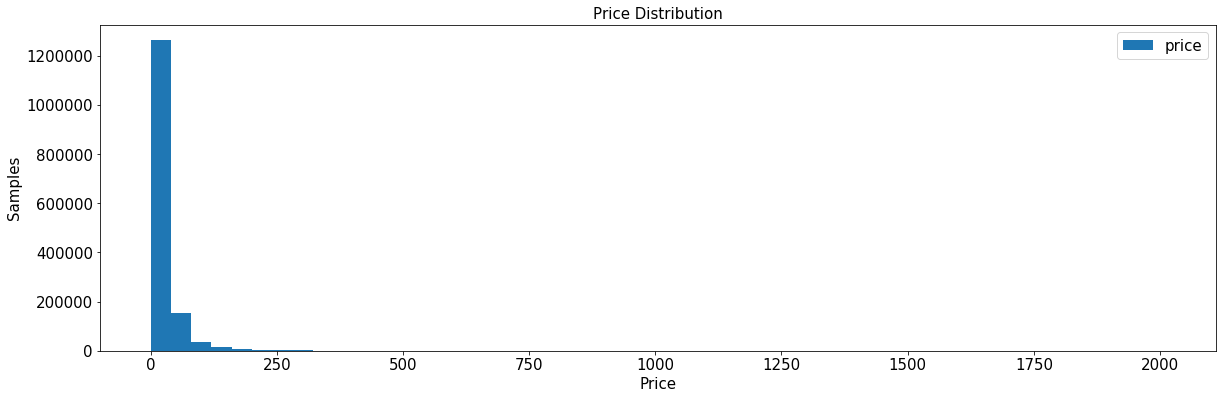

In [18]:
plt.figure(figsize=(20, 6))
plt.hist(train_fill['price'], bins=50, range=[0,2010], label='price')
plt.title('Price Distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

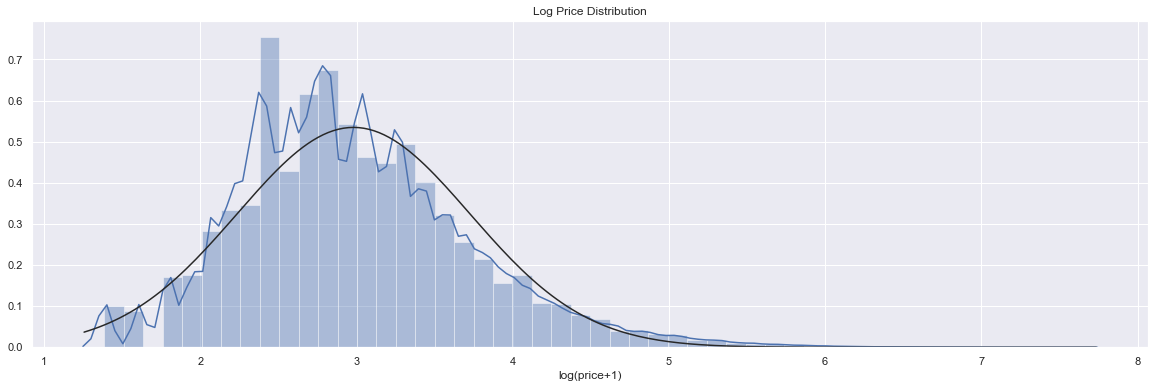

In [103]:
plt.figure(figsize=(20, 6))
sns.distplot(np.log(train_fill['price']+1), fit = stats.norm)
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Log Price Distribution', fontsize=12);

In [95]:
# lets see by brand name how its priced
brand = train_fill.groupby('brand_name').price.agg(['count','mean'])
brand = brand[brand['count']>1000].sort_values(by='mean', ascending=False)
brand.head(30)

,count,mean
brand_name,,
Louis Vuitton,3187,202.187637
Gucci,1857,97.070005
Air Jordan,3509,96.198632
Tiffany & Co.,1256,84.102707
Tory Burch,3447,81.771976
Chanel,2353,74.770081
Beats,1249,73.568455
Apple,17314,73.302472
Jordan,1862,71.080559


In [99]:
# lets visualize the count by brand name
brand = train_fill['brand_name'].value_counts()
fig = go.Figure([go.Pie(labels=brand.keys(), values=brand)])
fig.update_traces(hole=.5, hoverinfo="label+percent+name")
fig.update_layout(title_text="% by brand")
fig.show()

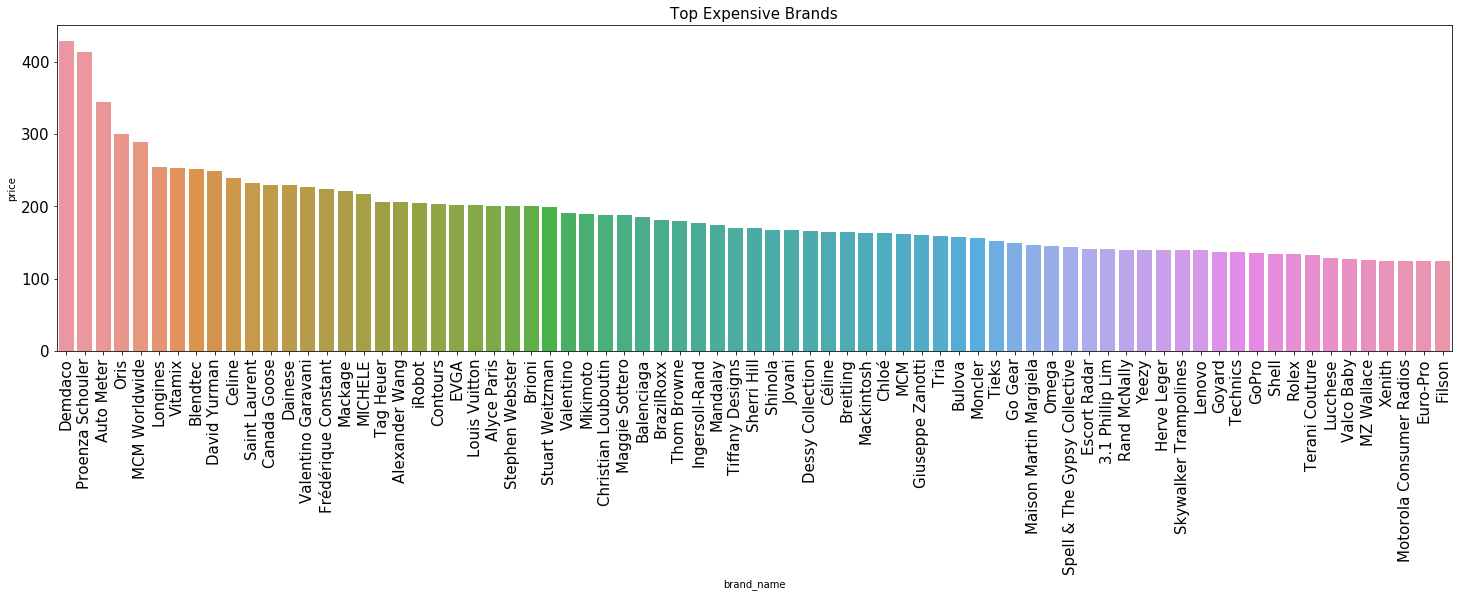

In [97]:
# lets visualize Top 75 Expensive Brands By Mean Price
plt.figure(figsize=(25, 6))
top_brands = train_fill.groupby('brand_name', axis=0).mean()
df_expPrice = pd.DataFrame(top_brands.sort_values('price', ascending = False)['price'][0:75].reset_index())


ax = sns.barplot(x="brand_name", y="price", data=df_expPrice)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=15)
ax.set_title('Top Expensive Brands', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [100]:
# lets see by main category how its priced
maincat = train_fill.groupby('category_split_0').price.agg(['count','mean'])
maincat = maincat[maincat['count']>1000].sort_values(by='mean', ascending=False)
maincat.head(30)

,count,mean
category_split_0,,
Electronics,122632,35.190558
Men,93609,34.734940
Women,663990,28.902679
Vintage & Collectibles,46519,27.345891
Sports & Outdoors,25322,25.552385
unknown,6314,25.446943
Home,67831,24.551068
Other,45329,20.819917
Kids,171555,20.658439


In [101]:
# lets visualize the count by main category or category_split_0
categories = train_fill['category_split_0'].value_counts()
fig = go.Figure([go.Pie(labels=categories.keys(), values=categories)])
fig.update_traces(hole=.5, hoverinfo="label+percent+name")
fig.update_layout(title_text="% by Main Category")
fig.show()

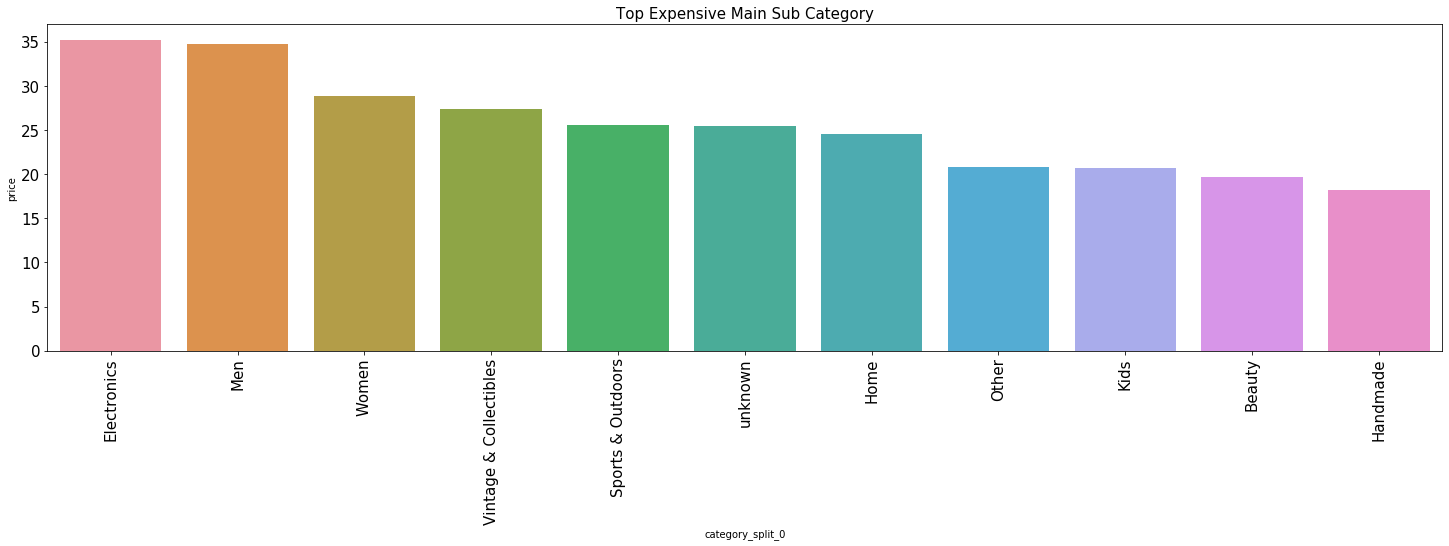

In [36]:
# lets visualize Top 75 category_split_0 By Mean Price
plt.figure(figsize=(25, 6))
category = train_fill.groupby('category_split_0', axis=0).mean()
df_expPrice = pd.DataFrame(category.sort_values('price', ascending = False)['price'][0:75].reset_index())
result = df_expPrice.groupby(["category_split_0"])['price'].aggregate(np.median).reset_index().sort_values('price')

ax = sns.barplot(x="category_split_0", y="price", data=df_expPrice)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=15)
ax.set_title('Top Expensive Main Sub Category', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

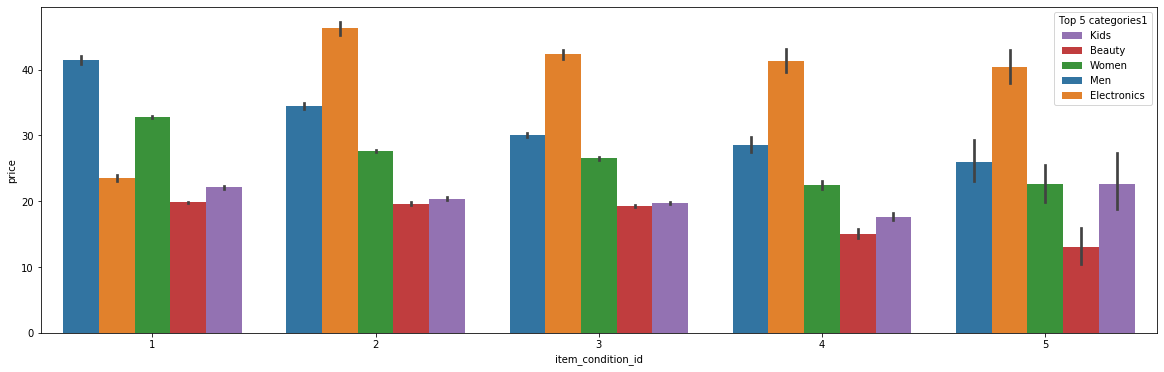

In [69]:
#price comparison by item condition across 5 most frequent Main Categories
plt.figure(figsize=(20, 6))
sns.barplot(x='item_condition_id', y="price", hue='category_split_0', data=train_fill[(train_fill['category_split_0'] == train_fill['category_split_0'].value_counts().index[0]) | (train_fill['category_split_0'] == train_fill['category_split_0'].value_counts().index[1]) | (train_fill['category_split_0'] == train_fill['category_split_0'].value_counts().index[2]) | (train_fill['category_split_0'] == train_fill['category_split_0'].value_counts().index[3]) | (train_fill['category_split_0'] == train_fill['category_split_0'].value_counts().index[4])])
handles, labels = plt.gca().get_legend_handles_labels()
handles = [handles[4], handles[3], handles[2], handles[0], handles[1]]
labels = [labels[4], labels[3], labels[2], labels[0], labels[1]]
plt.legend(handles, labels, title='Top 5 categories1', loc='upper right');

In [102]:
# lets see by second main category or category_split_1 how its priced
seccat = train_fill.groupby('category_split_1').price.agg(['count','mean'])
seccat = seccat[seccat['count']>1000].sort_values(by='mean', ascending=False)
seccat.head(30)

,count,mean
category_split_1,,
Computers & Tablets,7432,87.970533
Cameras & Photography,3975,71.361761
Bags and Purses,6336,61.810448
Women's Handbags,45828,58.244828
Musical instruments,1031,46.729389
"TV, Audio & Surveillance",9118,44.183757
Shoes,100384,41.839546
Home Appliances,2586,37.812838
Coats & Jackets,18376,34.164073


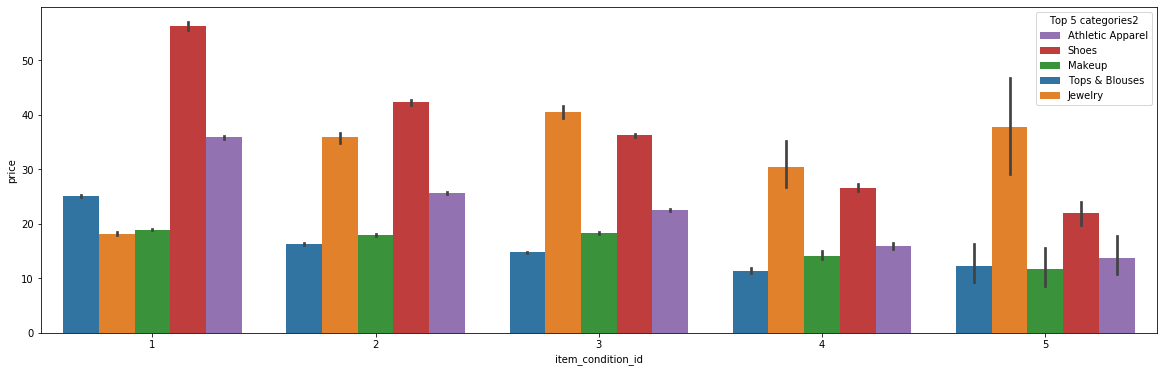

In [74]:
#price comparison by item condition across 5 most frequent Second Main Categories
plt.figure(figsize=(20, 6))
sns.barplot(x='item_condition_id', y="price", hue='category_split_1', data=train_fill[(train_fill['category_split_1'] == train_fill['category_split_1'].value_counts().index[0]) | (train_fill['category_split_1'] == train_fill['category_split_1'].value_counts().index[1]) | (train_fill['category_split_1'] == train_fill['category_split_1'].value_counts().index[2]) | (train_fill['category_split_1'] == train_fill['category_split_1'].value_counts().index[3]) | (train_fill['category_split_1'] == train_fill['category_split_1'].value_counts().index[4])])
handles, labels = plt.gca().get_legend_handles_labels()
handles = [handles[4], handles[3], handles[2], handles[0], handles[1]]
labels = [labels[4], labels[3], labels[2], labels[0], labels[1]]
plt.legend(handles, labels, title='Top 5 categories2', loc='upper right');

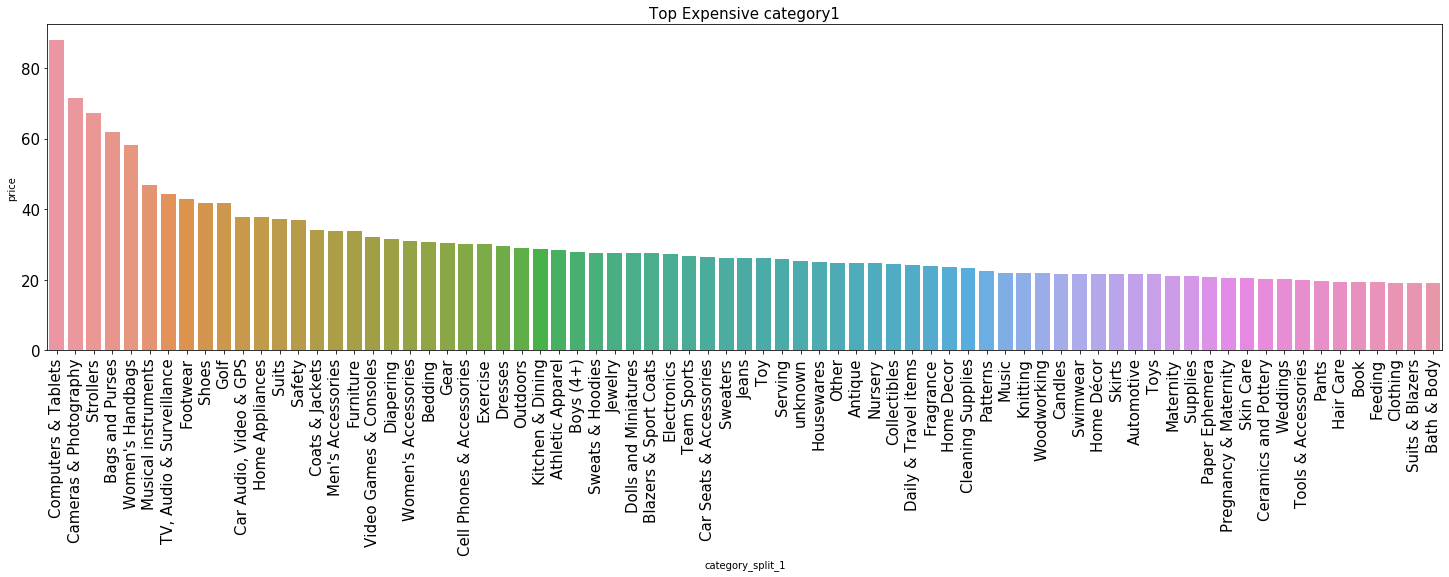

In [37]:
# Display Top 75 category_split_1 By Mean Price
plt.figure(figsize=(25, 6))
category = train_fill.groupby('category_split_1', axis=0).mean()
df_expPrice = pd.DataFrame(category.sort_values('price', ascending = False)['price'][0:75].reset_index())

ax = sns.barplot(x="category_split_1", y="price", data=df_expPrice)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=15)
ax.set_title('Top Expensive category1', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [103]:
# lets see by third main category or category_split_2 how its priced
thrdcat = train_fill.groupby('category_split_2').price.agg(['count','mean'])
thrdcat = thrdcat[thrdcat['count']>1000].sort_values(by='mean', ascending=False)
thrdcat.head(30)

,count,mean
category_split_2,,
Laptops & Netbooks,1783,177.089176
Handbag,1366,139.664714
Digital Cameras,1346,112.305349
Satchel,2331,111.720292
Cell Phones & Smartphones,8692,109.184825
Consoles,4206,90.219448
iPad,3055,73.680196
Shoulder Bag,15317,66.022916
Camera & Photo Accessories,1056,60.648674


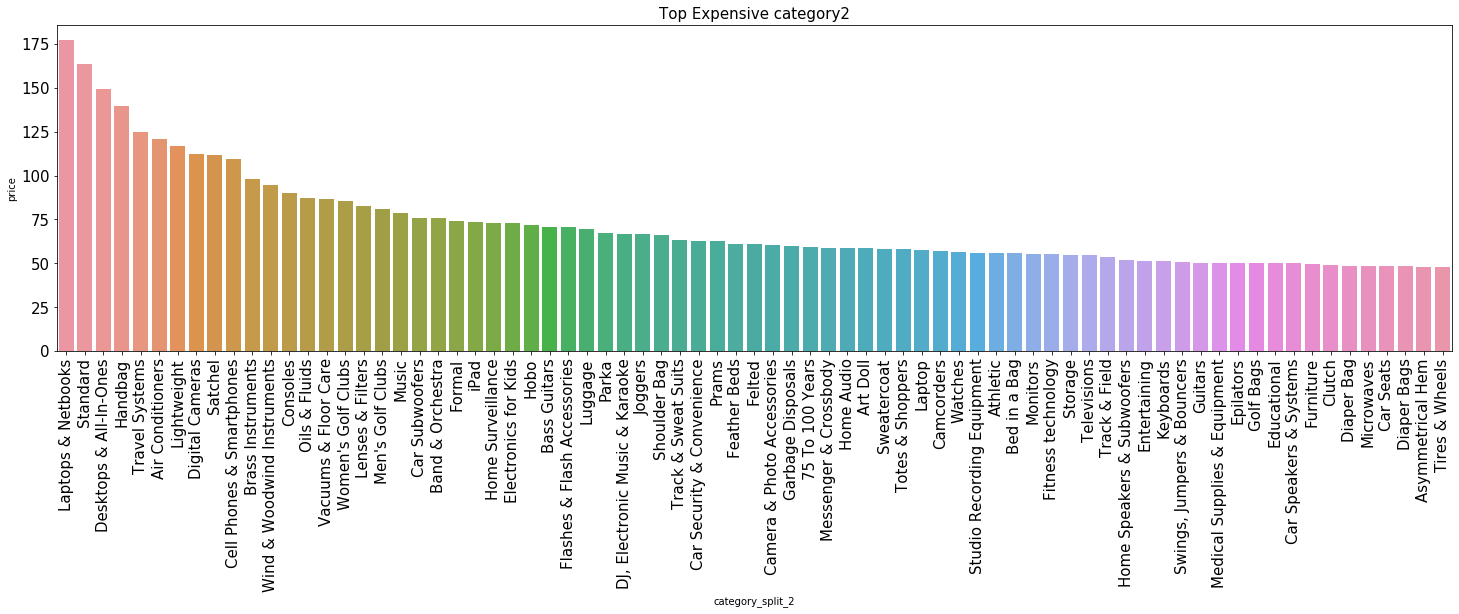

In [28]:
# Display Top 75 category_split_2 By Mean Price
plt.figure(figsize=(25, 6))
top_category2 = train_fill.groupby('category_split_2', axis=0).mean()
df_expPrice = pd.DataFrame(top_category2.sort_values('price', ascending = False)['price'][0:75].reset_index())

ax = sns.barplot(x="category_split_2", y="price", data=df_expPrice)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=15)
ax.set_title('Top Expensive category2', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [104]:
# lets visualize the count by item_condition_id
condition = train_fill['item_condition_id'].value_counts()
fig = go.Figure([go.Pie(labels=condition.keys(), values=condition)])
fig.update_traces(hole=.5, hoverinfo="label+percent+name")
fig.update_layout(title_text="% by Item Condition Id",
                 )
fig.show()

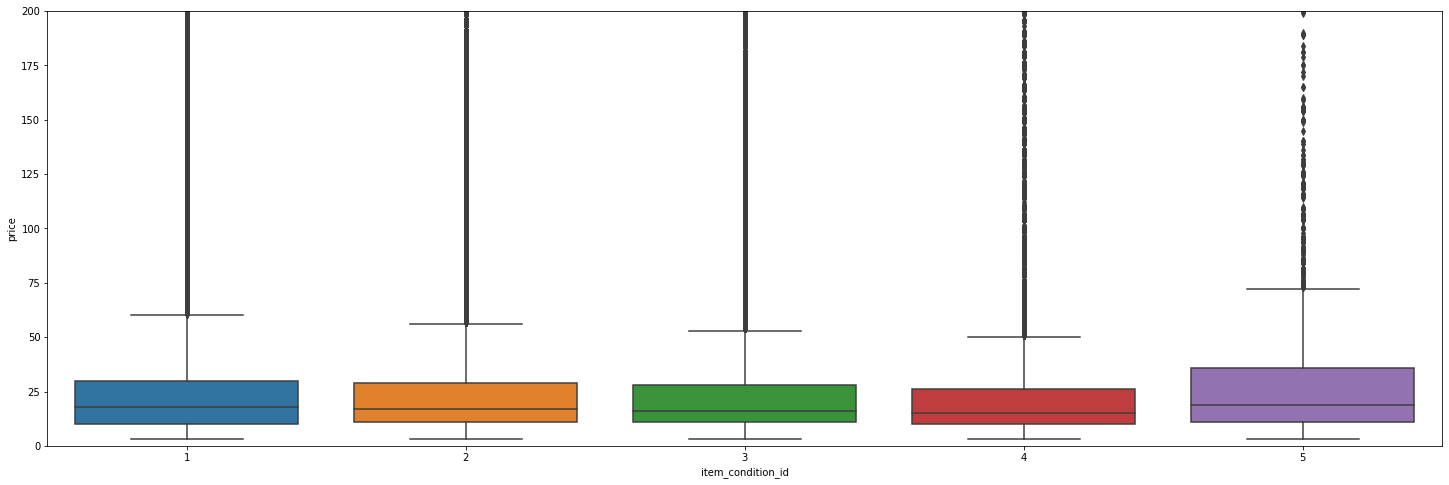

In [44]:
# visualizing the price distribution by Item Condition
plt.figure(figsize=(25, 8))

sns.boxplot(x='item_condition_id', y="price", data=train_fill)
plt.ylim(0, 200);

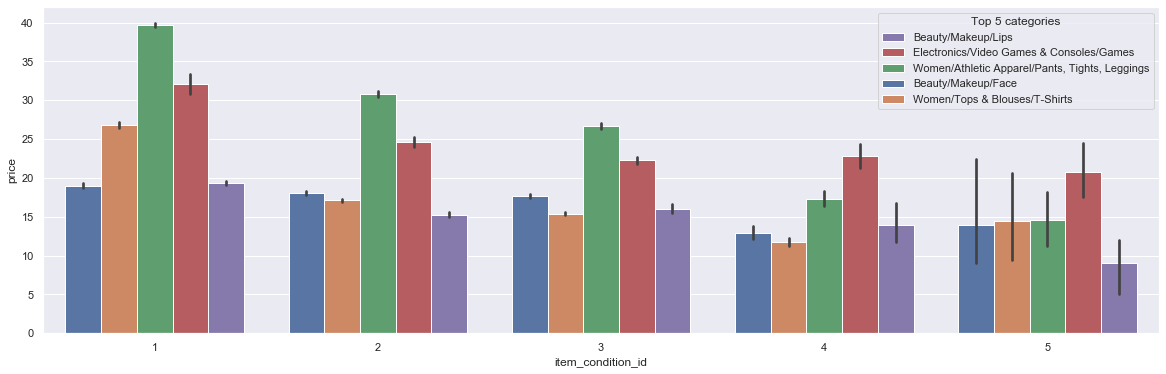

In [63]:
#price comparison by item condition across 5 most frequent Category Names
plt.figure(figsize=(20, 6))
sns.barplot(x='item_condition_id', y="price", hue='category_name', data=train_fill[(train_fill['category_name'] == train_fill['category_name'].value_counts().index[0]) | (train_fill['category_name'] == train_fill['category_name'].value_counts().index[1]) | (train_fill['category_name'] == train_fill['category_name'].value_counts().index[2]) | (train_fill['category_name'] == train_fill['category_name'].value_counts().index[3]) | (train_fill['category_name'] == train_fill['category_name'].value_counts().index[4])])
handles, labels = plt.gca().get_legend_handles_labels()
handles = [handles[4], handles[3], handles[2], handles[0], handles[1]]
labels = [labels[4], labels[3], labels[2], labels[0], labels[1]]
plt.legend(handles, labels, title='Top 5 categories', loc='upper right');

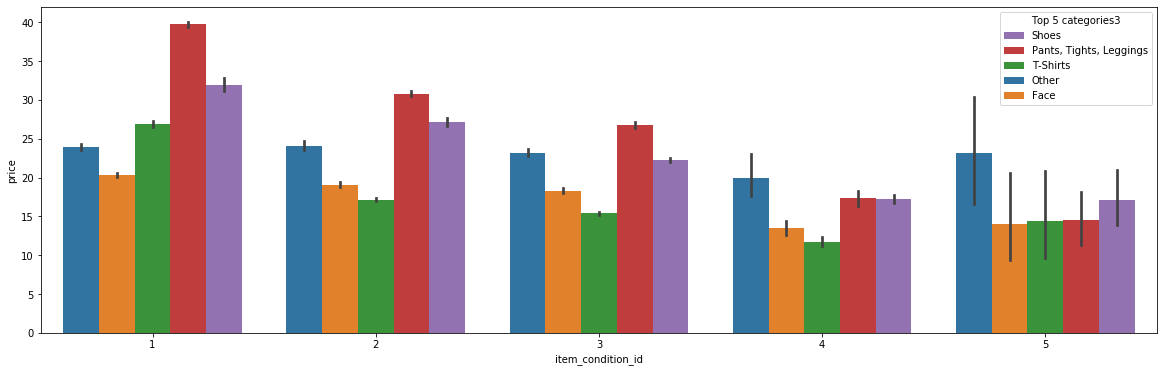

In [75]:
#price comparison by item condition across 5 most frequent Third Main Categories
plt.figure(figsize=(20, 6))
sns.barplot(x='item_condition_id', y="price", hue='category_split_2', data=train_fill[(train_fill['category_split_2'] == train_fill['category_split_2'].value_counts().index[0]) | (train_fill['category_split_2'] == train_fill['category_split_2'].value_counts().index[1]) | (train_fill['category_split_2'] == train_fill['category_split_2'].value_counts().index[2]) | (train_fill['category_split_2'] == train_fill['category_split_2'].value_counts().index[3]) | (train_fill['category_split_2'] == train_fill['category_split_2'].value_counts().index[4])])
handles, labels = plt.gca().get_legend_handles_labels()
handles = [handles[4], handles[3], handles[2], handles[0], handles[1]]
labels = [labels[4], labels[3], labels[2], labels[0], labels[1]]
plt.legend(handles, labels, title='Top 5 categories3', loc='upper right');

In [76]:
# define function for text normalization
import string

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stopwords
from nltk.stem.porter import PorterStemmer

def text_normalization(text):
    # lowercase words
    text = text.lower()
    # remove stopwords
    text = ' '.join([i for i in text.split(' ') if i not in stopwords])
    #remove digits
    text = ''.join([i for i in text if not i.isdigit()])
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # stemming
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

In [79]:
%%time

train_fill['item_description_normalized'] = train_fill['item_description'].apply(text_normalization).copy()

CPU times: user 7min 24s, sys: 1.39 s, total: 7min 25s
Wall time: 7min 27s


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
%%time

train_fill['name_normalized'] = train_fill['name'].apply(text_normalization).copy()

CPU times: user 1min 52s, sys: 307 ms, total: 1min 52s
Wall time: 1min 52s


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
pd.set_option('display.width', 1000)

# check first item description
train_fill['item_description'][:8]

0                                   No description yet
1    This keyboard is in great condition and works ...
2    Adorable top with a hint of lace and a key hol...
3    New with tags. Leather horses. Retail for [rm]...
4            Complete with certificate of authenticity
5    Banana republic bottoms, Candies skirt with ma...
6    Size small but straps slightly shortened to fi...
7    You get three pairs of Sophie cheer shorts siz...
Name: item_description, dtype: object

In [85]:
# check first item description after normalization and compare with previous result
train_fill['item_description_normalized'][:8]

0                                             descript
1    keyboard great condit work like came box port ...
2    ador hint lace key hole back pale pink x x ava...
3    new tag leather hors retail rm each stand foot...
4                               complet certif authent
5    banana republ bottom candi skirt match blazera...
6    size small strap slightli shorten fit xs that ...
7    pair sophi cheer short size small medium girl ...
Name: item_description_normalized, dtype: object

In [81]:
train_fill['name_normalized'][:8]

0    mlb cincinnati red t shirt size xl
1      razer blackwidow chroma keyboard
2                          avaviv blous
3                    leather hors statu
4                     k gold plate rose
5               bundl item request ruie
6           acacia pacif tide santorini
7                girl cheer tumbl bundl
Name: name_normalized, dtype: object

In [82]:
train_fill['name'][:8]

0     MLB Cincinnati Reds T Shirt Size XL
1        Razer BlackWidow Chroma Keyboard
2                          AVA-VIV Blouse
3                   Leather Horse Statues
4                    24K GOLD plated rose
5        Bundled items requested for Ruie
6      Acacia pacific tides santorini top
7    Girls cheer and tumbling bundle of 7
Name: name, dtype: object

(-0.5, 399.5, 199.5, -0.5)

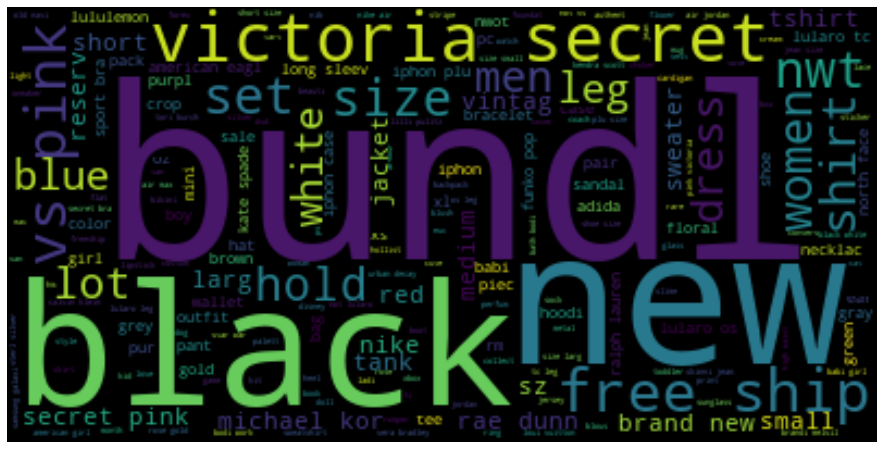

In [89]:
# Generate a word cloud image for name
wordcloud = WordCloud().generate((train_fill['name_normalized'].sample(100000) + ' ').sum())
plt.figure(figsize=(20,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

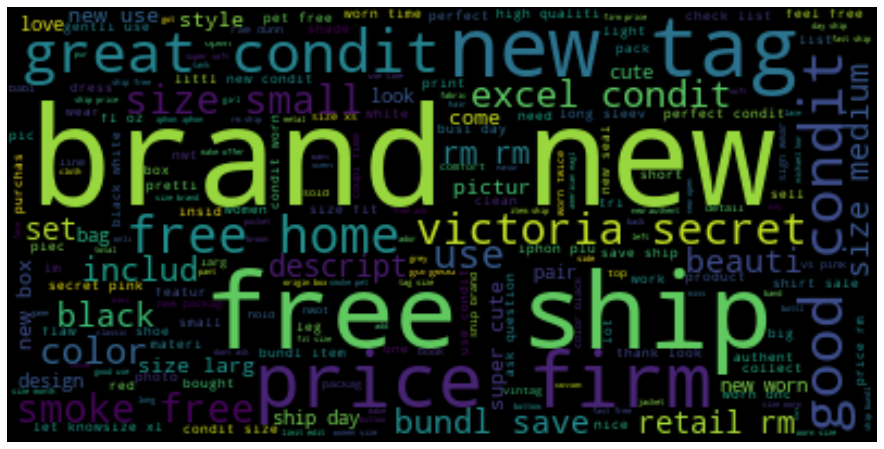

In [90]:
# Generate a word cloud image for name
wordcloud = WordCloud().generate((train_fill['item_description_normalized'].sample(100000) + ' ').sum())
plt.figure(figsize=(20,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [73]:
train_fill.to_pickle("./df_preprocessed.pkl")

In [88]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer()

In [76]:
item_description_bow = vectorizer.fit_transform(train_fill['item_description_normalized'])
item_description_bow

<1481661x248194 sparse matrix of type '<class 'numpy.int64'>'
	with 21519321 stored elements in Compressed Sparse Row format>

In [77]:
full_info(train_fill)

,ColName,ColType,NullCnt,NullCntPrcntg,Min,Max,Mean,Med,Std,UniqCnt,ColValCnt
0,train_id,int64,0,0.00,0.00,1482534.00,741243.72,741238.00,427971.46,NaN,1481661
1,name,object,0,0.00,NaN,NaN,NaN,NaN,NaN,1224596.0,1481661
2,item_condition_id,int64,0,0.00,1.00,5.00,1.91,2.00,0.90,NaN,1481661
3,category_name,object,6314,0.43,NaN,NaN,NaN,NaN,NaN,1287.0,1475347
4,brand_name,object,0,0.00,NaN,NaN,NaN,NaN,NaN,4808.0,1481661
5,price,float64,0,0.00,3.00,2009.00,26.75,17.00,38.59,NaN,1481661
6,shipping,int64,0,0.00,0.00,1.00,0.45,0.00,0.50,NaN,1481661
7,item_description,object,0,0.00,NaN,NaN,NaN,NaN,NaN,1280671.0,1481661
8,category0,object,0,0.00,NaN,NaN,NaN,NaN,NaN,11.0,1481661
9,category1,object,0,0.00,NaN,NaN,NaN,NaN,NaN,114.0,1481661


In [82]:
name_bow = vectorizer.fit_transform(train_fill['name'])
brand_name_bow = vectorizer.fit_transform(train_fill['brand_name'])
main_category_bow = vectorizer.fit_transform(train_fill['category_name'])
subcategory_1_bow = vectorizer.fit_transform(train_fill['category0'])
subcategory_2_bow = vectorizer.fit_transform(train_fill['category1'])
subcategory_3_bow = vectorizer.fit_transform(train_fill['category2'])

In [84]:

from scipy.sparse import hstack, csr_matrix

item_condition_id_sparse = csr_matrix(train_fill['item_condition_id'])
shipping_sparse = csr_matrix(train_fill['shipping'])

In [87]:
sparse_merge_bow = hstack((name_bow, brand_name_bow, main_category_bow, subcategory_1_bow, subcategory_2_bow, subcategory_3_bow, item_condition_id_sparse.T, shipping_sparse.T, item_description_bow), format='csr', dtype='float32')
#dtype=float32 because of lightgbm, otherwise we get an error
sparse_merge_bow

<1481661x361096 sparse matrix of type '<class 'numpy.float32'>'
	with 44016130 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer = CountVectorizer(binary=True)


In [132]:
# to_categorical - Converts Categorical Features 
def to_categorical(df):
    df['brand_name1'] = df['brand_name'].astype
    df['category_name1'] = df['category_name'].astype('category')
    df['item_condition_id1'] = df['item_condition_id'].astype('category')

In [133]:
train_fill1 = to_categorical(train_fill)

/Users/dad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [134]:
train_fill

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category0,category1,category2,item_description_normalized,brand_name1,category_name1,item_condition_id1
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,unknown,10.0,1,No description yet,Men,Tops,T-shirts,descript,unknown,Men/Tops/T-shirts,3
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,keyboard great condit work like came box port ...,Razer,Electronics/Computers & Tablets/Components & P...,3
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,ador hint lace key hole pale pink x x avail white,Target,Women/Tops & Blouses/Blouse,1
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,new tag leather hor retail rm stand foot high ...,unknown,Home/Home Décor/Home Décor Accents,1
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,unknown,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,complet certif authent,unknown,Women/Jewelry/Necklaces,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf,lace say size small fit medium perfectli use s...,Free People,Women/Dresses/Mid-Calf,2
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses,littl mermaid handmad dress worn size t,Disney,Kids/Girls 2T-5T/Dresses,2
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,unknown,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories,use twice great shape,unknown,Sports & Outdoors/Exercise/Fitness accessories,2
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,unknown,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents,red orang big red orang world market,unknown,Home/Home Décor/Home Décor Accents,3
